In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json

print("""
We use World Bank Data from World Development Indicators, September 25th 2024.
https://datatopics.worldbank.org/world-development-indicators/
https://databank.worldbank.org/data/download/WDI_CSV.zip
""")
path = '../WDI_CSV_2024_09_25/WDICSV.csv'
df = pd.read_csv(path)


We use World Bank Data from World Development Indicators, September 25th 2024.
https://datatopics.worldbank.org/world-development-indicators/
https://databank.worldbank.org/data/download/WDI_CSV.zip



In [61]:
# Useful utility functions

# Get the data for a given country
def get_country_df(country: str):
  return df[df['Country Name'] == country]

# We have reliable data from 1980 to 2024

# Get data for a given indicator
def get_data_vector(label : str, df, year_range):
  Y = []
  values = df[df["Indicator Name"] == label]
  assert len(values) > 0, f"Indicator {label} not found"
  for year in year_range:
      Y.append(values[f"{year}"])
  return list(map(lambda y: float(y), Y))

def plot_labels(labels : list[str], df, year_range):
  n = len(labels)

  # Create a nx2 grid of subplots
  fig, axes = plt.subplots((n + 1) // 2, 2, figsize=(15,12))

  # Plot a scatter plot on each axis
  for i in range(n):
    axis = axes[i // 2, i % 2]
    axis.set_title(labels[i])
    sns.lineplot(ax=axis, x=year_range, y=get_data_vector(labels[i], df, year_range))
    axis.set_ylim(0, None)
  plt.tight_layout()
  plt.show()





Understanding the scale of Turkiye's dependency on fossil fuels
      
Turkiye is extremely dependent on fossil fuels imported from Russia for its energy needs.
Source: https://ember-climate.org/insights/research/turkiye-electricity-review-2024/



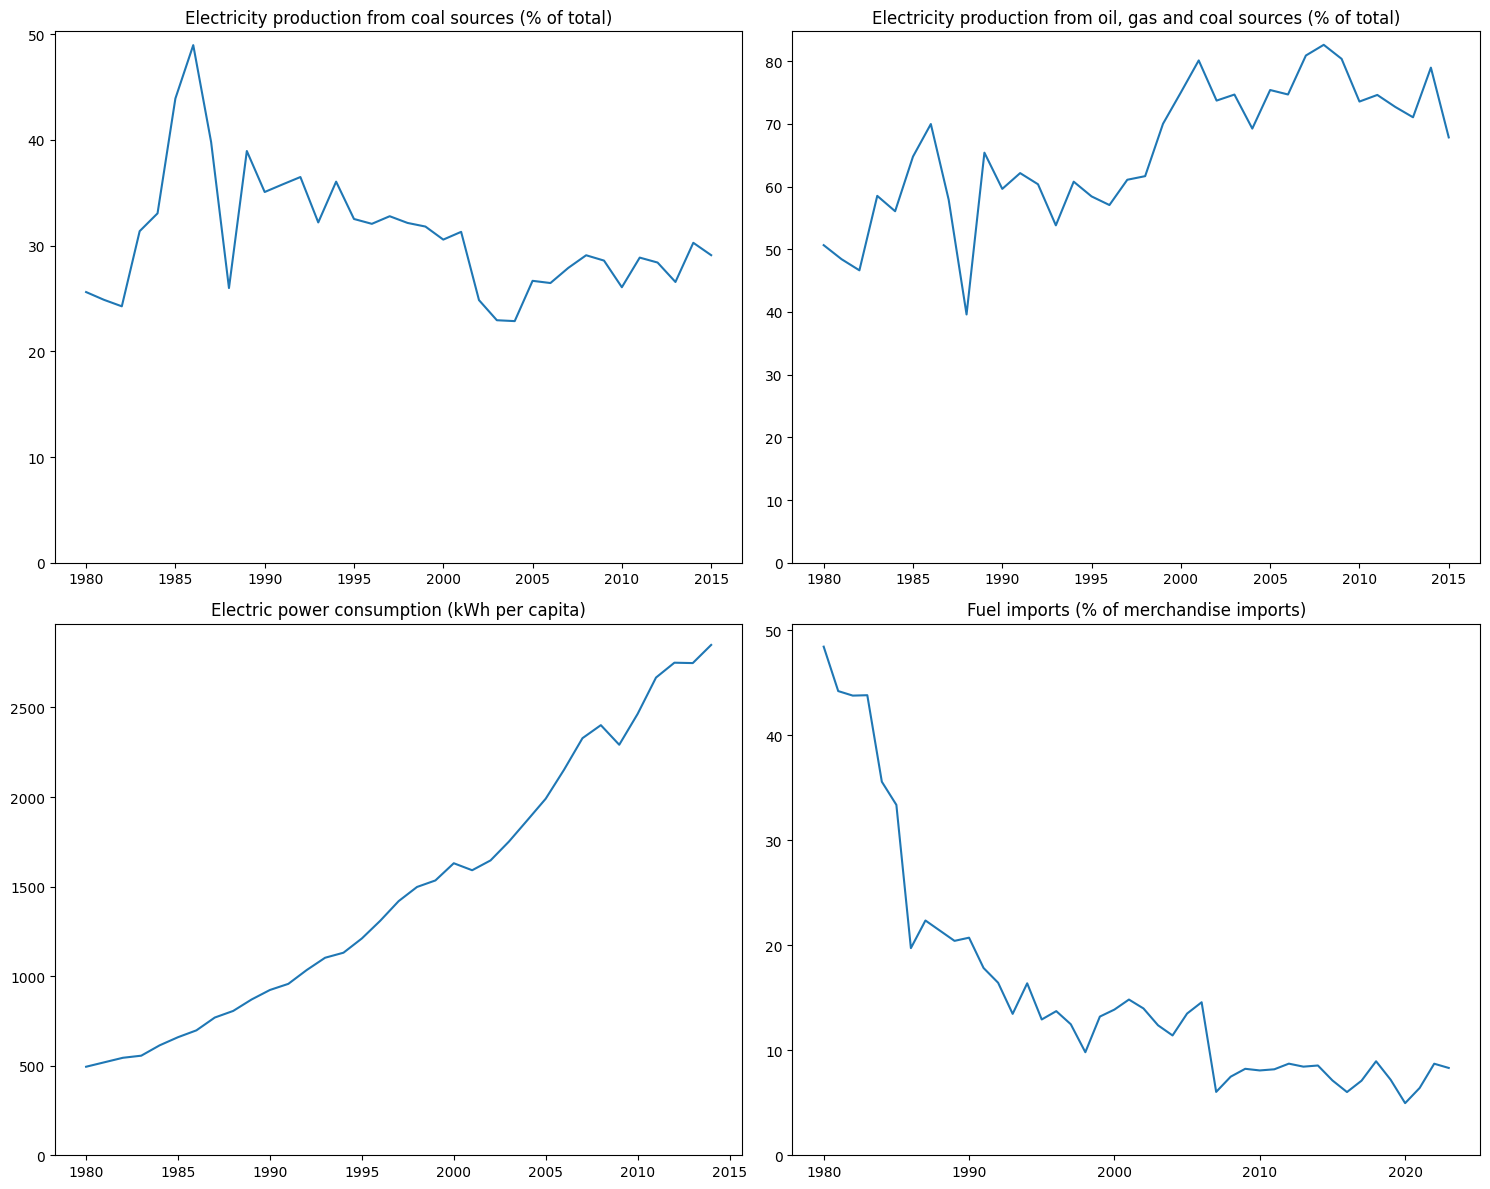

In [62]:
print("""
Understanding the scale of Turkiye's dependency on fossil fuels
      
Turkiye is extremely dependent on fossil fuels imported from Russia for its energy needs.
Source: https://ember-climate.org/insights/research/turkiye-electricity-review-2024/
""")

tdf = get_country_df("Turkiye")

percent_of_imports_are_fuel = "Fuel imports (% of merchandise imports)"
elec_production_coal_percent = "Electricity production from coal sources (% of total)"
elec_production_fossil_percent = "Electricity production from oil, gas and coal sources (% of total)"
ghg_emissions = "Total greenhouse gas emissions (kt of CO2 equivalent)"
kwh_consumption_per_capita = "Electric power consumption (kWh per capita)"

labels = [
  elec_production_coal_percent,
  elec_production_fossil_percent,
  kwh_consumption_per_capita,
  percent_of_imports_are_fuel, 
]

plot_labels(labels, tdf, range(1980, 2024))


Why do I care?
      
Turkiye has now overtaken the UK in terms of greenhouse gas emissions.
It is no longer sufficient to look within my country for solutions to the climate crisis.
The road to renewables offers a once in a generation opportunity to transform the world.
To prevent wars, stop hurricanes, save the ecosystem of Earth.
      
The only reason the transition to renewables hasn't happened already is because people aren't moving fast enough.



(0.0, 786018.021955)

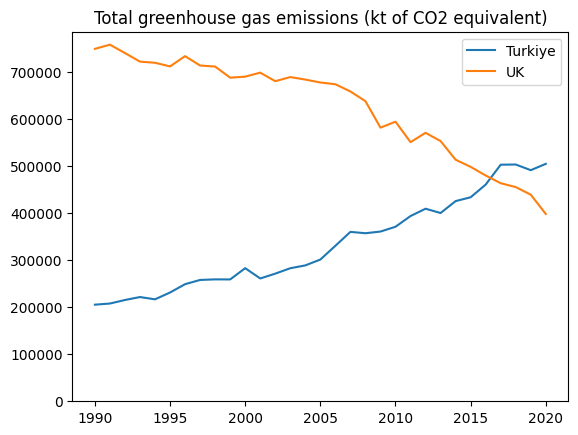

In [63]:
print("""
Why do I care?
      
Turkiye has now overtaken the UK in terms of greenhouse gas emissions.
It is no longer sufficient to look within my country for solutions to the climate crisis.
The road to renewables offers a once in a generation opportunity to transform the world.
To prevent wars, stop hurricanes, save the ecosystem of Earth.
      
The only reason the transition to renewables hasn't happened already is because people aren't moving fast enough.
""")

year_range = range(1980, 2024)
ukdf = get_country_df("United Kingdom")

sns.lineplot(x=year_range, y=get_data_vector(ghg_emissions, tdf, year_range), label="Turkiye")
sns.lineplot(x=year_range, y=get_data_vector(ghg_emissions, ukdf, year_range), label="UK")
plt.title(ghg_emissions)
plt.ylim(0, None)

In [64]:
print("""
The idea is simple. Buy a large plot of land in Turkiye and build a solar farm.
Then go from there.
      
Later on I have ideas about a peer to peer approach for funding (I'm a software engineer by trade).
There are many people in the UK looking for ethical investment, individuals could buy panels,
which could generate them part of the profits. This enables fast scaling.
""")


The idea is simple. Buy a large plot of land in Turkiye and build a solar farm.
Then go from there.
      
Later on I have ideas about a peer to peer approach for funding (I'm a software engineer by trade).
There are many people in the UK looking for ethical investment, individuals could buy panels,
which could generate them part of the profits. This enables fast scaling.



In [18]:
import os

# Exchange rates
exchange_rate_url = "https://open.er-api.com/v6/latest/TRY"
test_url = "https://jsonplaceholder.typicode.com/todos/1"
if os.path.exists("/tmp/rates.json"):
  with open("/tmp/rates.json") as file:
    rates = json.loads(file.read())
else:
  rates = requests.get(exchange_rate_url).json()
  with open("/tmp/rates.json", "w+") as file:
    file.write(json.dumps(rates))

try_to_gbp = rates['rates']['GBP']
try_to_usd = rates['rates']['USD']
try_to_eur = rates['rates']['EUR']
usd_to_try = 1 / try_to_usd
gbp_to_try = 1 / try_to_gbp
gbp_to_usd = try_to_usd / try_to_gbp
eur_to_try = 1 / try_to_eur
print(eur_to_try)

37.20238095238095


In [20]:
print("""
Market sizing
https://www.globalpetrolprices.com/Turkey/electricity_prices/
March 2024 Turkiye electricity prices: 0.048 USD per kWh
      
Electricity prices are currently lower bounded by oil prices.
The effect of this is that the cost of electricity in Turkiye is similar to the price of natural gas in the UK.

36TWh used in 2016
https://www.ceicdata.com/en/turkey/electricity-consumption-and-losses/electricity-consumption-ow-istanbul
""")

price_per_kWh_usd = 0.048
price_per_Wh_usd = price_per_kWh_usd / 1000
total_cost = 36 * 10**12 * price_per_Wh_usd

print(f"""Total cost of electricity in Turkiye in 2016:
${total_cost:,.2f} USD
{total_cost*usd_to_try:,.2f} TRY
""")


Market sizing
https://www.globalpetrolprices.com/Turkey/electricity_prices/
March 2024 Turkiye electricity prices: 0.048 USD per kWh
      
Electricity prices are currently lower bounded by oil prices.
The effect of this is that the cost of electricity in Turkiye is similar to the price of natural gas in the UK.

36TWh used in 2016
https://www.ceicdata.com/en/turkey/electricity-consumption-and-losses/electricity-consumption-ow-istanbul

Total cost of electricity in Turkiye in 2016:
$1,728,000,000.00 USD
59,129,482,617.03 TRY



In [25]:
print("""
Solar panel back of the envelope calculations
""")
sources = {}
sources["Example solar panel"] = "https://www.hdmsolar.co.uk/products/canadian-solar-395w-high-power-mono-perc-hiku6-all-black"

solar_panel_price_gbp = 42 # 35 without VAT
solar_panel_price_try = solar_panel_price_gbp * gbp_to_try
solar_panel_output_kw = 0.395
solar_panel_output_hours_year = 6 * 365 # Assume solar panel is at capacity 6 hours a day (it will gradually wind down in evenings)

solar_panel_output_kWh_per_year = solar_panel_output_kw * solar_panel_output_hours_year
print(f"Solar output kWh/year {solar_panel_output_kWh_per_year:.2f}")

solar_profit_per_panel_per_year_try = solar_panel_output_kWh_per_year * price_per_kWh_usd * usd_to_try

sources["Turkish minimum wage"] = "https://wageindicator.org/salary/minimum-wage/turkey"

turkish_minimum_wage = 20000
turkish_salary = 2.5 * turkish_minimum_wage

# Shipping
sources["Shipping costs"] = "https://www.dfsworldwide.com/Shipping-to-Turkey.html"
# I assume 10 panels fit in 10 cubic meters (VERY conservative)
shipping_cost_per_panel_eur = 490 / 10
shipping_cost_per_panel_try = shipping_cost_per_panel_eur * eur_to_try

working_days_per_year = 250
overhead_try = turkish_salary * (5 / working_days_per_year) # 5 days per panel (VERY conservative)

payback_period_years = (solar_panel_price_try + overhead_try + shipping_cost_per_panel_try) / solar_profit_per_panel_per_year_try
print(f"Payback period: {payback_period_years:.2f} years")
print(f"""Subsequent annual profit per panel:
  {solar_profit_per_panel_per_year_try:,.2f} TRY
  £{solar_profit_per_panel_per_year_try / gbp_to_try:,.2f} GBP

Profit after 10 years for 1000 panels. 1000 panels fit in 2000m^2, or less than 50m * 50m space
  {1000 * (10-payback_period_years) * solar_profit_per_panel_per_year_try:,.2f} TRY
  £{1000 * (10-payback_period_years) * solar_profit_per_panel_per_year_try / gbp_to_try:,.2f} GBP

Upfront costs for 1000 panels
  {1000 * solar_panel_price_try:,.2f} TRY
  £{1000 * solar_panel_price_try / gbp_to_try:,.2f} GBP
""")

print("Sources:")
for title, src in sources.items():
  print(f"{title}: {src}")


Solar panel back of the envelope calculations

Solar output kWh/year 865.05
Payback period: 3.30 years
Subsequent annual profit per panel:
  1,420.83 TRY
  £31.95 GBP

Profit after 10 years for 1000 panels. 1000 panels fit in 2000m^2, or less than 50m * 50m space
  9,517,908.60 TRY
  £214,057.76 GBP

Upfront costs for 1000 panels
  1,867,496.67 TRY
  £42,000.00 GBP

Sources:
Example solar panel: https://www.hdmsolar.co.uk/products/canadian-solar-395w-high-power-mono-perc-hiku6-all-black
Turkish minimum wage: https://wageindicator.org/salary/minimum-wage/turkey
Shipping costs: https://www.dfsworldwide.com/Shipping-to-Turkey.html


In [67]:
print("""
Notes:
- Shipping is currently using extreme estimates (shipping the panels to the UK and then to Turkiye)
- After the payback period, it's all profit (maintenance is tiny)

Possible flaws in analysis:
- Assumes zero land cost
- Assumes electricity prices will remain the same / comparable
- Assumes the grid can handle the capacity
- Assumes that someone priced at 2.5x the minimum wage can install a panel in 5 days
""")


Notes:
- Shipping is currently using extreme estimates (shipping the panels to the UK and then to Turkiye)
- After the payback period, it's all profit (maintenance is tiny)

Possible flaws in analysis:
- Assumes zero land cost
- Assumes electricity prices will remain the same / comparable
- Assumes the grid can handle the capacity
- Assumes that someone priced at 2.5x the minimum wage can install a panel in 5 days

